## Cálculo da FTN

### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Cristiano/OneDrive - Belago Technologies/Documentos/projeto_fnt/data/dataframe_concat.csv")
df2 = pd.read_csv("C:/Users/Cristiano/OneDrive - Belago Technologies/Documentos/projeto_fnt/data/BASES_COMPLETAS.csv")

In [3]:
df.head(2)

,regiao,operacao,original,temperaturatermometro,amplitude,status,dataref,year,month,day,error_category,year_month
0,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
1,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02


In [4]:
df2.head(2)

,COD_TERM,DESCRICAO TERM,DATA LEITURA,TEMP MÍN,TEMP MÁX,TEMP MÉDIA,DELTA,ERRO MÍN.,ERRO MÁX,ERRO DELTA,VERIFIC.,ANO
0,ZAR,ARARAQUARA,2007-01-24,21.0,22.0,21.5,1.0,NaN,NaN,erro,ERRO,2007
1,ZAR,ARARAQUARA,2007-01-25,20.0,38.0,29.0,18.0,NaN,NaN,NaN,OK,2007


In [5]:
# Certifique-se de que as colunas de data estão no formato datetime
df['dataref'] = pd.to_datetime(df['dataref'])
df2['DATA LEITURA'] = pd.to_datetime(df2['DATA LEITURA'])

In [6]:
df_merged = pd.merge(df, df2, left_on='dataref', right_on='DATA LEITURA', how='left')

In [9]:
# Remover uma das colunas de data (exemplo: 'DATA LEITURA')
df_merged = df_merged.drop(columns=['DATA LEITURA'])


In [10]:
df_merged

,regiao,operacao,original,temperaturatermometro,amplitude,status,dataref,year,month,day,...,DESCRICAO TERM,TEMP MÍN,TEMP MÁX,TEMP MÉDIA,DELTA,ERRO MÍN.,ERRO MÁX,ERRO DELTA,VERIFIC.,ANO
0,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,...,ARARAQUARA,20.0,48.0,34.0,28.0,NaN,NaN,NaN,OK,2020.0
1,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,...,EMBU-GUACU,19.0,36.0,27.5,17.0,NaN,NaN,NaN,OK,2020.0
2,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,...,ITU,19.0,36.0,27.5,17.0,NaN,NaN,NaN,OK,2020.0
3,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,...,MAIRINQUE,19.0,46.0,32.5,27.0,NaN,NaN,NaN,OK,2020.0
4,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,...,RIO_CLARO,21.0,44.0,32.5,23.0,NaN,NaN,NaN,OK,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525285,NORTE,araraquara,thermo_id_20001336,111.5,1.1,ErroTO,2024-12-27,2024,12,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1525286,NORTE,araraquara,thermo_id_20001336,111.5,1.1,ErroTO,2024-12-27,2024,12,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1525287,NORTE,araraquara,thermo_id_20001336,111.5,1.1,ErroTO,2024-12-27,2024,12,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1525288,NORTE,araraquara,thermo_id_20001336,111.5,1.3,ErroTO,2024-12-27,2024,12,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Renomear as colunas, por exemplo:
df_merged.rename(columns={
    'TEMP MÍN': 'temp_min',
    'TEMP MÁX': 'temp_max',
    'TEMP MÉDIA': 'temp_media',
    'DELTA': 'delta',
    'ERRO MÍN.': 'erro_min',
    'ERRO MÁX': 'erro_max',
    'ERRO DELTA': 'erro_delta',
    'VERIFIC.': 'verific',
    'ANO': 'ano'
}, inplace=True)


In [16]:
# Ajustar o código para remover apenas as colunas que existem no DataFrame
columns_to_drop = ['DESCRICAO TERM', 'temp_min', 'temp_media', 'erro_min', 'ERRO MÁX', 'erro_delta', 'verific', 'ano']

# Verificar quais colunas realmente existem no DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df_merged.columns]

# Remover as colunas existentes
df_merged.drop(columns=existing_columns_to_drop, inplace=True)

# Exibir o DataFrame após a remoção das colunas
df_merged

,regiao,operacao,original,temperaturatermometro,amplitude,status,dataref,year,month,day,error_category,year_month,COD_TERM,temp_max,delta,ERRO MÁX
0,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02,ZAR,48.0,28.0,NaN
1,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02,ZEM,36.0,17.0,NaN
2,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02,ZYU,36.0,17.0,NaN
3,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02,ZMK,46.0,27.0,NaN
4,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02,ZRO,44.0,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525285,NORTE,araraquara,thermo_id_20001336,111.5,1.1,ErroTO,2024-12-27,2024,12,27,ErroTO,2024-12,NaN,NaN,NaN,NaN
1525286,NORTE,araraquara,thermo_id_20001336,111.5,1.1,ErroTO,2024-12-27,2024,12,27,ErroTO,2024-12,NaN,NaN,NaN,NaN
1525287,NORTE,araraquara,thermo_id_20001336,111.5,1.1,ErroTO,2024-12-27,2024,12,27,ErroTO,2024-12,NaN,NaN,NaN,NaN
1525288,NORTE,araraquara,thermo_id_20001336,111.5,1.3,ErroTO,2024-12-27,2024,12,27,ErroTO,2024-12,NaN,NaN,NaN,NaN


In [17]:
df_merged.isnull().sum()

regiao                         0
operacao                       0
original                       0
temperaturatermometro          0
amplitude                      0
status                         0
dataref                        0
year                           0
month                          0
day                            0
error_category                 0
year_month                     0
COD_TERM                  144800
temp_max                  144800
delta                     144800
ERRO MÁX                 1522104
dtype: int64

In [18]:
df_normal = df[df['status'] == 'Normal']

In [20]:
df_normal.isnull().sum()

regiao                   0
operacao                 0
original                 0
temperaturatermometro    0
amplitude                0
status                   0
dataref                  0
year                     0
month                    0
day                      0
error_category           0
year_month               0
dtype: int64

In [23]:
df_normal.drop(columns=['year_month', 'error_category'], inplace=True)

C:\Users\Cristiano\AppData\Local\Temp\ipykernel_25432\1029184985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal.drop(columns=['year_month', 'error_category'], inplace=True)


In [24]:
df_normal.head(5)

,regiao,operacao,original,temperaturatermometro,amplitude,status,dataref,year,month,day
0,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5
1,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5
2,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5
3,NORTE,araraquara,thermo_ID_21106,26.0,6.0,Normal,2020-02-05,2020,2,5
4,NORTE,araraquara,thermo_ID_21106,24.0,4.0,Normal,2020-02-05,2020,2,5


## 1. Agregar por dia (mínimo e máximo)

In [25]:
# Primeiro, vamos garantir que a coluna 'dataref' está em formato datetime
df['dataref'] = pd.to_datetime(df['dataref'])

# Agora, vamos agrupar por dia e calcular o mínimo e máximo das temperaturas
df_daily = df.groupby('dataref').agg(
    temp_min=('temperaturatermometro', 'min'),
    temp_max=('temperaturatermometro', 'max')
).reset_index()

# Visualizando as primeiras linhas
df_daily.head()

,dataref,temp_min,temp_max
0,2020-02-05,21.0,28.0
1,2020-02-06,20.0,37.0
2,2020-02-07,18.0,39.0
3,2020-02-08,18.0,45.0
4,2020-02-09,20.0,37.0


## 2. Usar apenas as medidas sem erro

In [26]:
# Filtrando apenas as linhas com status "Normal"
df_normal = df[df['status'] == 'Normal']

# Agora, agregamos por dia novamente com os dados filtrados
df_normal_daily = df_normal.groupby('dataref').agg(
    temp_min=('temperaturatermometro', 'min'),
    temp_max=('temperaturatermometro', 'max')
).reset_index()

# Visualizando as primeiras linhas
df_normal_daily.head()

,dataref,temp_min,temp_max
0,2020-02-05,21.0,28.0
1,2020-02-06,20.0,37.0
2,2020-02-07,18.0,39.0
3,2020-02-08,18.0,45.0
4,2020-02-09,20.0,37.0


## 3. Complementar com o histórico dos termômetros

In [29]:
df_combined = df_normal
df_combined

,regiao,operacao,original,temperaturatermometro,amplitude,status,dataref,year,month,day,error_category,year_month
0,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
1,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
2,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
3,NORTE,araraquara,thermo_ID_21106,26.0,6.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
4,NORTE,araraquara,thermo_ID_21106,24.0,4.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
...,...,...,...,...,...,...,...,...,...,...,...,...
236616,NORTE,araraquara,thermo_id_20001336,60.7,61.7,Normal,2024-12-21,2024,12,21,Normal,2024-12
236617,NORTE,araraquara,thermo_id_20001336,56.1,57.1,Normal,2024-12-21,2024,12,21,Normal,2024-12
236634,NORTE,araraquara,thermo_id_20001336,62.4,38.5,Normal,2024-12-22,2024,12,22,Normal,2024-12
237775,NORTE,araraquara,thermo_id_20001336,58.7,34.5,Normal,2024-12-27,2024,12,27,Normal,2024-12


## 3a. Cálculo do Centro de Gravidade

In [47]:
# Supondo que o dataframe seja chamado df_combined
df_combined['dataref'] = pd.to_datetime(df_combined['dataref']) 

# Filtrar apenas as linhas com status "Normal"
df_normal = df_combined[df_combined['status'] == 'Normal']

# Agrupar por dia e calcular o mínimo e máximo das temperaturas
df_daily = df_normal.groupby('dataref').agg(
    temp_min=('temperaturatermometro', 'min'),
    temp_max=('temperaturatermometro', 'max')
).reset_index()

# Definir os blocos de 2 graus para as temperaturas máximas
temp_bins = np.arange(df_daily['temp_min'].min(), df_daily['temp_max'].max() + 2, 2)

# Classificar os dados de temperatura máxima em bins de 2 graus
df_daily['temp_bin'] = pd.cut(df_daily['temp_max'], bins=temp_bins)

# Obter os valores médios de cada bin para usá-los nos cálculos
df_daily['temp_bin_center'] = df_daily['temp_bin'].apply(lambda x: (x.left + x.right) / 2)

# Contar a quantidade de dias em cada bin
df_bin_count = df_daily.groupby('temp_bin_center').size().reset_index(name='count')

# Verificar se não há valores ausentes
df_bin_count = df_bin_count.dropna(subset=['temp_bin_center', 'count'])

# Garantir que as colunas estejam no tipo numérico correto
df_bin_count['X'] = pd.to_numeric(df_bin_count['temp_bin_center'], errors='coerce')
df_bin_count['Area'] = pd.to_numeric(2 * df_bin_count['count'], errors='coerce')

# Verificar se os valores de 'X' e 'Area' 
print(df_bin_count[['temp_bin_center', 'X', 'Area']])

# Calcular as variáveis MX e MY
df_bin_count['MX'] = df_bin_count['Area'] * df_bin_count['X']

# MY: A média ponderada da quantidade de dias no bin
df_bin_count['MY'] = df_bin_count['Area'] * df_bin_count['X']  

# Calcular CG X e CG Y
CG_X = df_bin_count['MX'].sum() / df_bin_count['Area'].sum()
CG_Y = df_bin_count['MY'].sum() / df_bin_count['Area'].sum()

# Definir a faixa de temperatura neutra
CG_center = CG_X + 5
CG_range = (CG_X, CG_X + 10)

# Exibir os resultados
print(f"CG_X: {CG_X}, CG_Y: {CG_Y}, Centro da FTN: {CG_center}, Faixa da FTN: {CG_range}")

C:\Users\Cristiano\AppData\Local\Temp\ipykernel_25432\2659355033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['dataref'] = pd.to_datetime(df_combined['dataref'])  # Converter a coluna 'dataref' para datetime


   temp_bin_center     X  Area
0            -19.0 -19.0     0
1            -17.0 -17.0     0
2            -15.0 -15.0     0
3            -13.0 -13.0     0
4            -11.0 -11.0     0
5             -9.0  -9.0     0
6             -7.0  -7.0     0
7             -5.0  -5.0     0
8             -3.0  -3.0     0
9             -1.0  -1.0     0
10             1.0   1.0     0
11             3.0   3.0     0
12             5.0   5.0     0
13             7.0   7.0     0
14             9.0   9.0     2
15            11.0  11.0     0
16            13.0  13.0    10
17            15.0  15.0    10
18            17.0  17.0     8
19            19.0  19.0    10
20            21.0  21.0    14
21            23.0  23.0    24
22            25.0  25.0    32
23            27.0  27.0    52
24            29.0  29.0    44
25            31.0  31.0    58
26            33.0  33.0   124
27            35.0  35.0   198
28            37.0  37.0   228
29            39.0  39.0   342
30            41.0  41.0   408
31      

C:\Users\Cristiano\AppData\Local\Temp\ipykernel_25432\2659355033.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bin_count = df_daily.groupby('temp_bin_center').size().reset_index(name='count')


In [62]:
CG_center

np.float64(46.886308068459655)

## 3b. Cálculo da FTN com Mínimo e Máximo

In [48]:
# Agrupar por dia e calcular o mínimo e máximo das temperaturas
df_daily = df_combined.groupby('dataref').agg(
    temp_min=('temperaturatermometro', 'min'),
    temp_max=('temperaturatermometro', 'max')
).reset_index()

# Calcular o mínimo e máximo histórico
min_historico = df_daily['temp_min'].min()
max_historico = df_daily['temp_max'].max()

# Cálculo do início, centro e fim da FTN
inicio_ftn = (min_historico + max_historico) / 2
centro_ftn = inicio_ftn + 5
fim_ftn = inicio_ftn + 10

print(min_historico, max_historico, inicio_ftn, centro_ftn, fim_ftn)

-20.0 63.2 21.6 26.6 31.6


## 3c. Cálculo da FTN com 4 Sigma

In [60]:
# Agrupar por dia e calcular o mínimo e máximo das temperaturas
df_daily = df_combined.groupby('dataref').agg(
    temp_min=('temperaturatermometro', 'min'),
    temp_max=('temperaturatermometro', 'max')
).reset_index()

# Calcular o desvio padrão para as mínimas e máximas
std_min = df_daily['temp_min'].std()
std_max = df_daily['temp_max'].std()

# Calcular o número de medidas a serem removidas
n_min = int(0.0062 * len(df_daily['temp_min']))
n_max = int(0.0062 * len(df_daily['temp_max']))

# Ordenar e remover as medidas mais extremas
df_daily_sorted_min = df_daily.sort_values('temp_min')
df_daily_sorted_max = df_daily.sort_values('temp_max')

df_daily_trimmed = df_daily_sorted_min.iloc[n_min:-n_min]
df_daily_trimmed = df_daily_trimmed.iloc[n_max:-n_max]

# Recalcular o mínimo e máximo após a remoção
min_historico_trimmed = df_daily_trimmed['temp_min'].min()
max_historico_trimmed = df_daily_trimmed['temp_max'].max()

# Recalcular a FTN
inicio_FTN_trimmed = (min_historico_trimmed + max_historico_trimmed) / 2
centro_FTN_trimmed = inicio_FTN_trimmed + 5
fim_FTN_trimmed = inicio_FTN_trimmed + 10

inicio_FTN_trimmed, centro_FTN_trimmed, fim_FTN_trimmed

(np.float64(32.3), np.float64(37.3), np.float64(42.3))

In [61]:
centro_FTN_trimmed

np.float64(37.3)

In [58]:
df_zar = df_combined[df_combined['operacao'] == 'araraquara']

# Salvar em um arquivo CSV
#df_zar.to_csv('zar_temperaturas.csv', index=False)

## Gráfico Análise das Temperaturas ao Longo do Tempo

C:\Users\Cristiano\AppData\Local\Temp\ipykernel_25432\1325308704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['dataref'] = pd.to_datetime(df_combined['dataref'])  # Converter a coluna 'dataref' para datetime


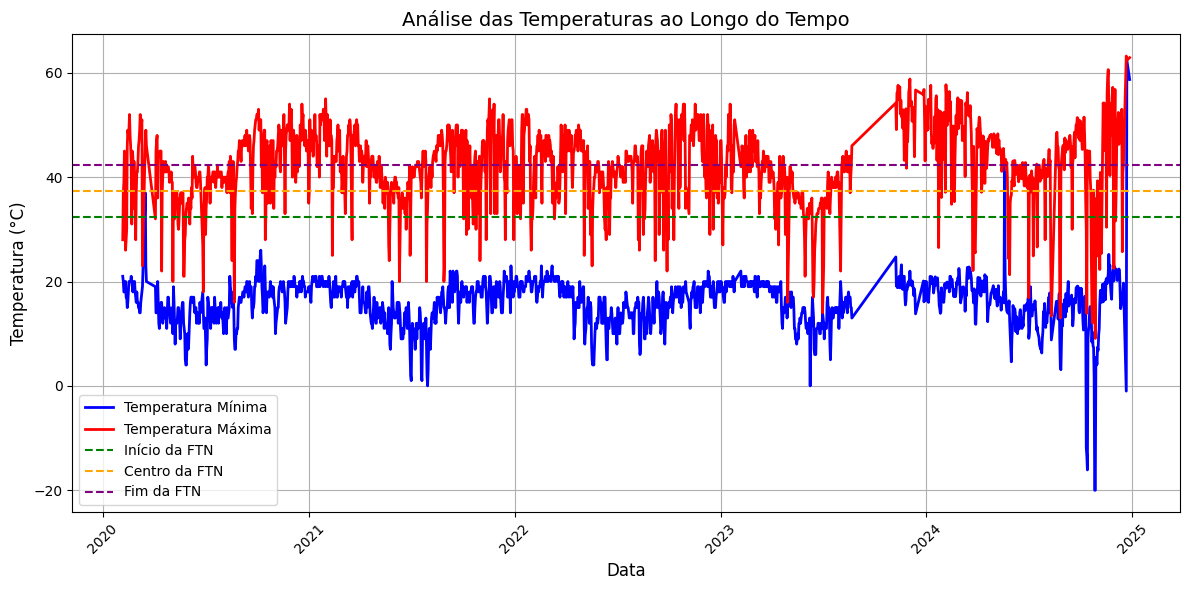

In [59]:
df_combined['dataref'] = pd.to_datetime(df_combined['dataref'])  # Converter a coluna 'dataref' para datetime

# Plotando as temperaturas mínimas e máximas ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df_daily['dataref'], df_daily['temp_min'], label='Temperatura Mínima', color='blue', linestyle='-', linewidth=2)
plt.plot(df_daily['dataref'], df_daily['temp_max'], label='Temperatura Máxima', color='red', linestyle='-', linewidth=2)

# Adicionando a faixa de Temperatura Neutra (FTN)
plt.axhline(y=inicio_FTN_trimmed, color='green', linestyle='--', label='Início da FTN')
plt.axhline(y=centro_FTN_trimmed, color='orange', linestyle='--', label='Centro da FTN')
plt.axhline(y=fim_FTN_trimmed, color='purple', linestyle='--', label='Fim da FTN')

plt.title('Análise das Temperaturas ao Longo do Tempo', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)

plt.legend()

plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

## Gráfico Distribuição das Temperaturas e Faixa de Temperatura Neutra

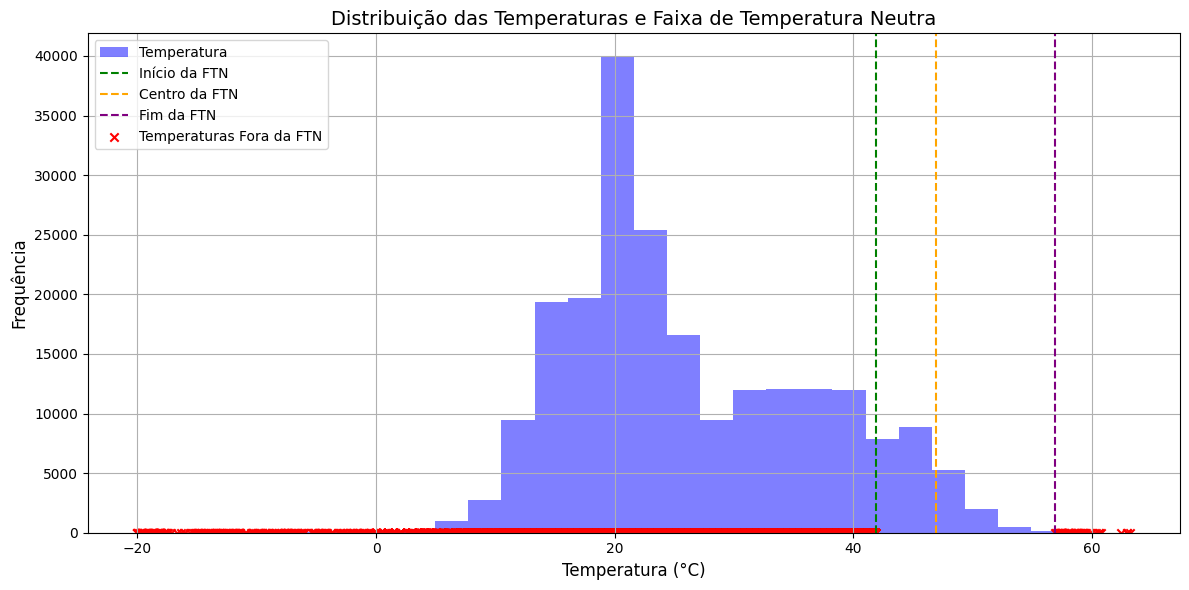

In [66]:
# Definindo os valores para a faixa de Temperatura Neutra (FTN)
inicio_FTN_trimmed = 41.886308068459655
centro_FTN_trimmed = 46.886308068459655 
fim_FTN_trimmed = centro_FTN_trimmed + 10 

plt.figure(figsize=(12, 6))

plt.hist(df_combined['temperaturatermometro'], bins=30, alpha=0.5, label='Temperatura', color='blue')

# Adicionando a faixa de Temperatura Neutra (FTN)
plt.axvline(x=inicio_FTN_trimmed, color='green', linestyle='--', label='Início da FTN')
plt.axvline(x=centro_FTN_trimmed, color='orange', linestyle='--', label='Centro da FTN')
plt.axvline(x=fim_FTN_trimmed, color='purple', linestyle='--', label='Fim da FTN')

# Exibindo as temperaturas fora da FTN (fora da faixa de 5 a 10 graus em torno do centro)
out_of_ftn = df_combined[(df_combined['temperaturatermometro'] < inicio_FTN_trimmed) |
                         (df_combined['temperaturatermometro'] > fim_FTN_trimmed)]

plt.scatter(out_of_ftn['temperaturatermometro'], np.zeros_like(out_of_ftn['temperaturatermometro']), 
            color='red', marker='x', label='Temperaturas Fora da FTN')

plt.title('Distribuição das Temperaturas e Faixa de Temperatura Neutra', fontsize=14)
plt.xlabel('Temperatura (°C)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.legend()

plt.grid(True)

plt.tight_layout()
plt.show()

## Gráfico Distribuição das Temperaturas e Centro de Gravidade (CG) com Faixa de Temperatura Neutra

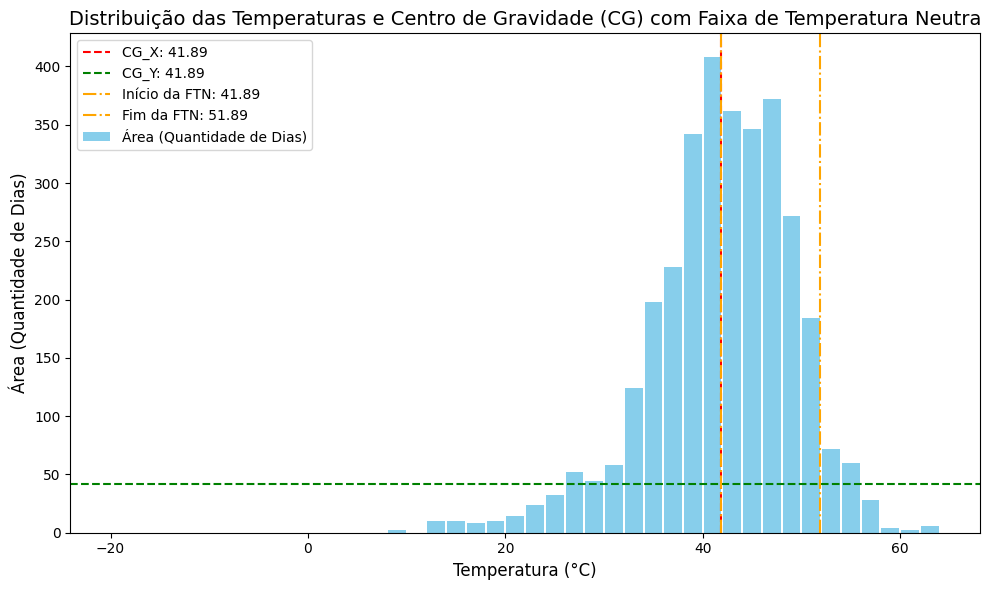

In [64]:
plt.figure(figsize=(10, 6))

plt.bar(df_bin_count['X'], df_bin_count['Area'], width=1.8, color='skyblue', label='Área (Quantidade de Dias)')

# Plotando o centro de gravidade CG_X e CG_Y no gráfico
plt.axvline(CG_X, color='red', linestyle='--', label=f'CG_X: {CG_X:.2f}')
plt.axhline(CG_Y, color='green', linestyle='--', label=f'CG_Y: {CG_Y:.2f}')

# Plotando a faixa de temperatura neutra
plt.axvline(CG_range[0], color='orange', linestyle='-.', label=f'Início da FTN: {CG_range[0]:.2f}')
plt.axvline(CG_range[1], color='orange', linestyle='-.', label=f'Fim da FTN: {CG_range[1]:.2f}')

plt.title('Distribuição das Temperaturas e Centro de Gravidade (CG) com Faixa de Temperatura Neutra', fontsize=14)
plt.xlabel('Temperatura (°C)', fontsize=12)
plt.ylabel('Área (Quantidade de Dias)', fontsize=12)

plt.legend()

plt.tight_layout()
plt.show()